## RQ3: AFFECTIVE STATE

In [1]:
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from run_stats import *

### SURVEYS

In [2]:
survey_data = pd.read_excel("Experimental_Data_revised.xlsx", "Surveys")
task_data = pd.read_excel("Experimental_Data_revised.xlsx", "Tasks")
mood_data = pd.read_excel("Experimental_Data_revised.xlsx", "Mood")

In [3]:
# Experimental data spreadsheet
# surveys sheet
important_columns = ['ABILITY', 'PERFORMANCE', 'DISTRACTED', 'COMFORTABLE', 
                     'ACCURATE', 'FOCUS', 'FEASIBLE']


ABILITY

Neutral: [1.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0]
Lemon: [4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
Fish: [3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0]

Neutral, num elements: 10, mean: 4.0, std: 1.3416407864998738, normal (above 0.05 is normal): 0.0029986510053277016
Lemon, num elements: 10, mean: 4.7, std: 0.45825756949558405, normal (above 0.05 is normal): 4.713490488938987e-05
fish, num elements: 10, mean: 4.0, std: 0.7745966692414834, normal (above 0.05 is normal): 0.03521495312452316
Kruskal-Wallis: H 3.789405204460963, P VAL: 0.15036304603210499

PERFORMANCE

Neutral: [1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0]
Lemon: [2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Fish: [2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0]

Neutral, num elements: 10, mean: 2.9, std: 0.8306623862918076, normal (above 0.05 is normal): 0.025551754981279373
Lemon, num elements: 10, mean: 3.3, std: 0.7810249675906654, normal (above 0.05 is normal): 0.0084999054

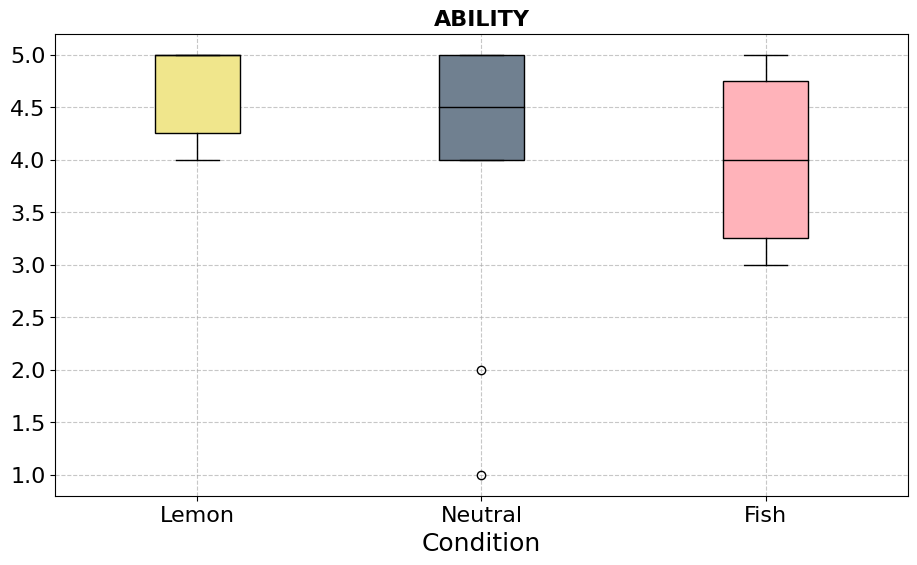

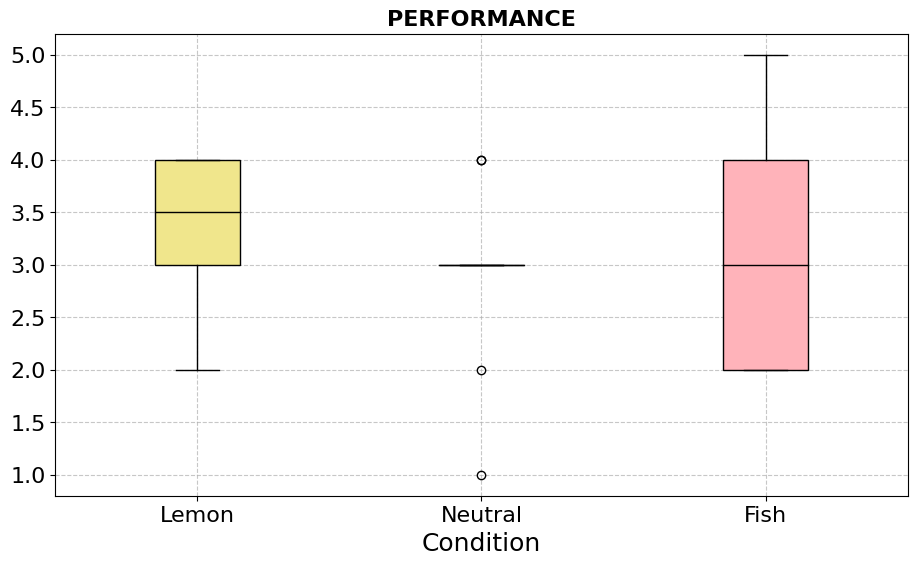

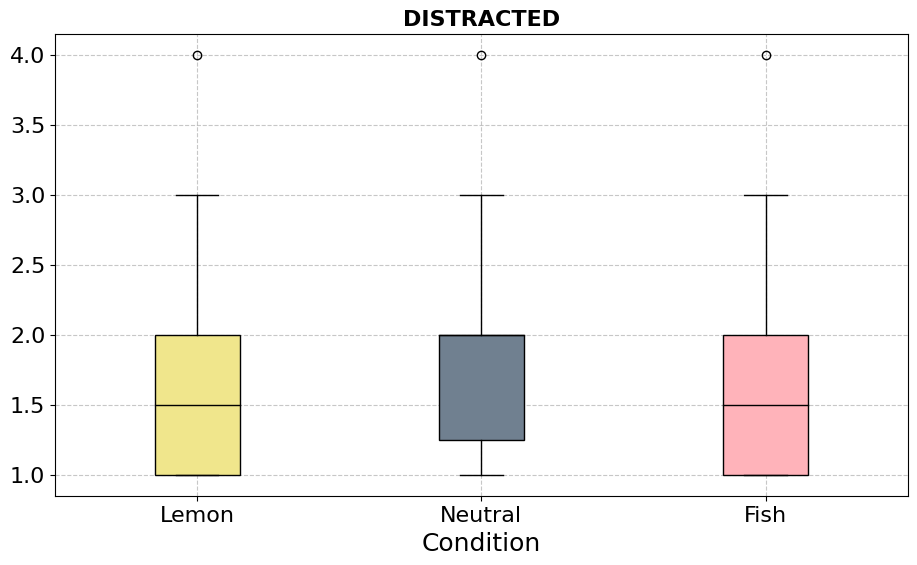

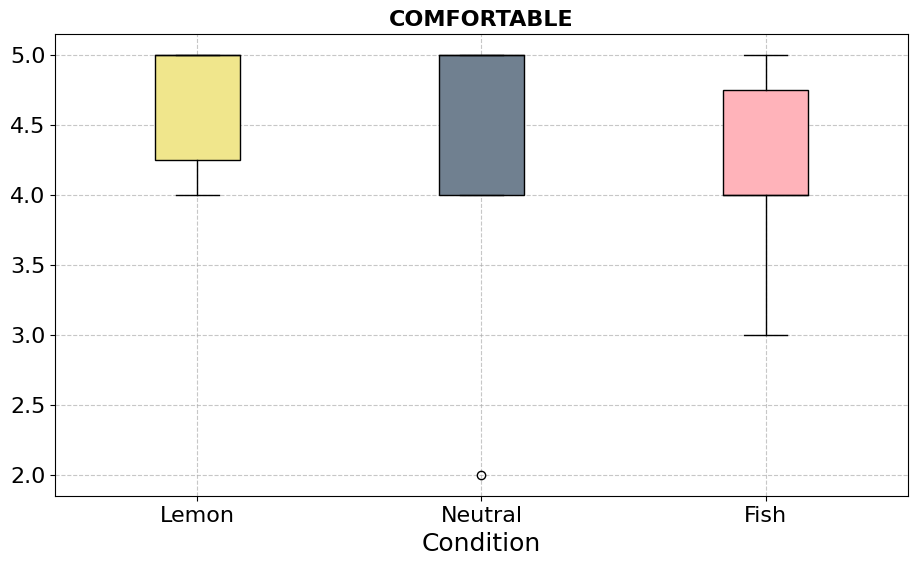

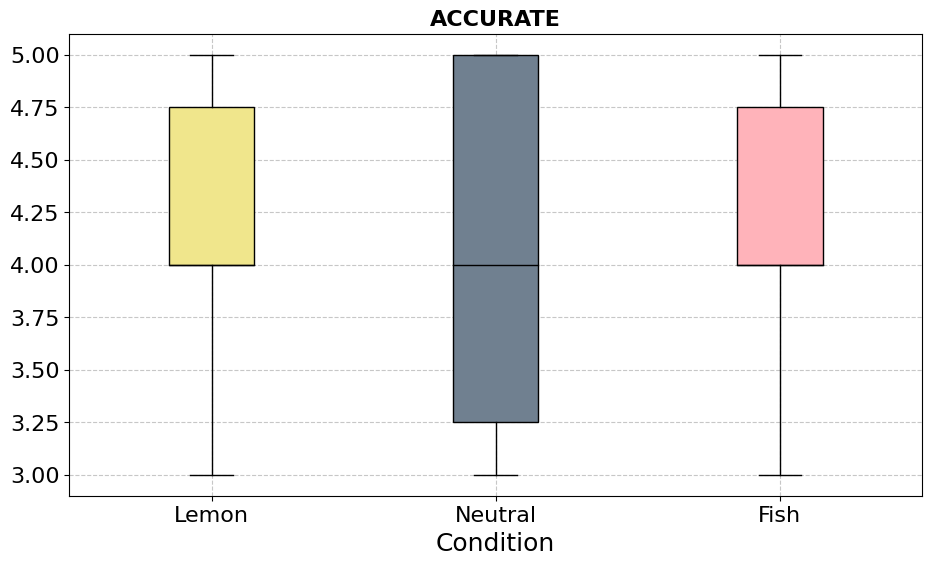

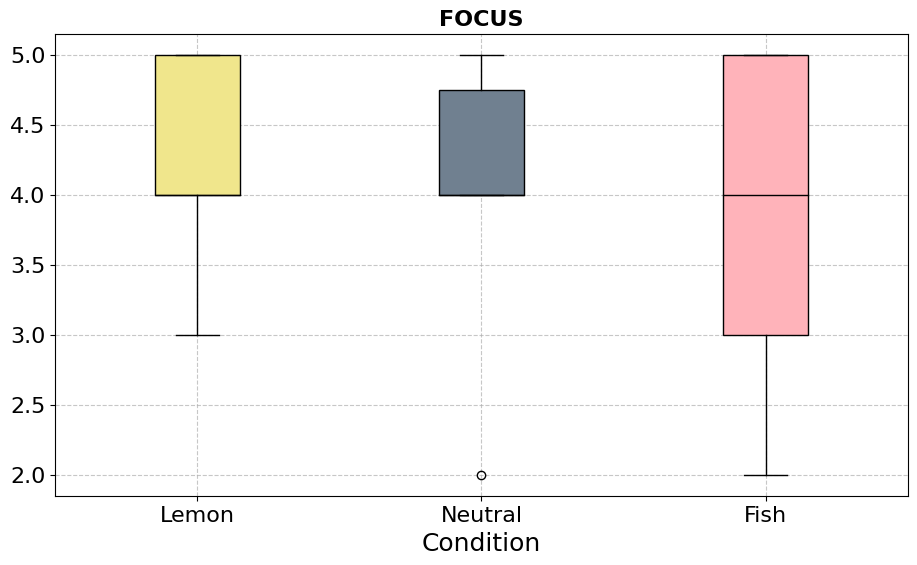

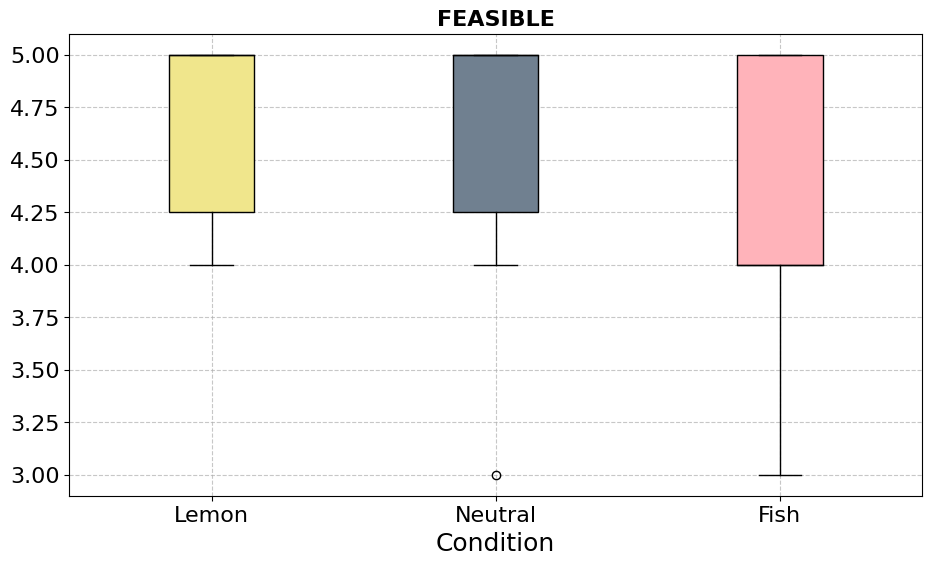

In [4]:
for col in important_columns:
    fish, lemon, neutral = make_three_group_lists(survey_data, col)
    three_lists_stats(fish, lemon, neutral, col)

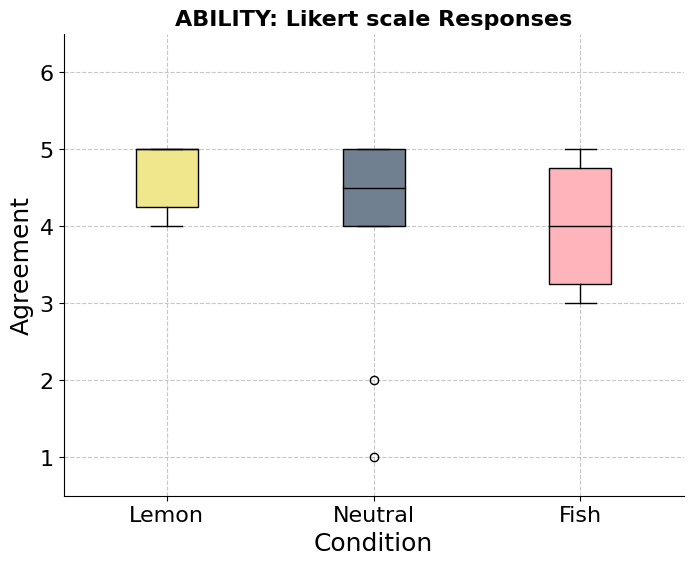

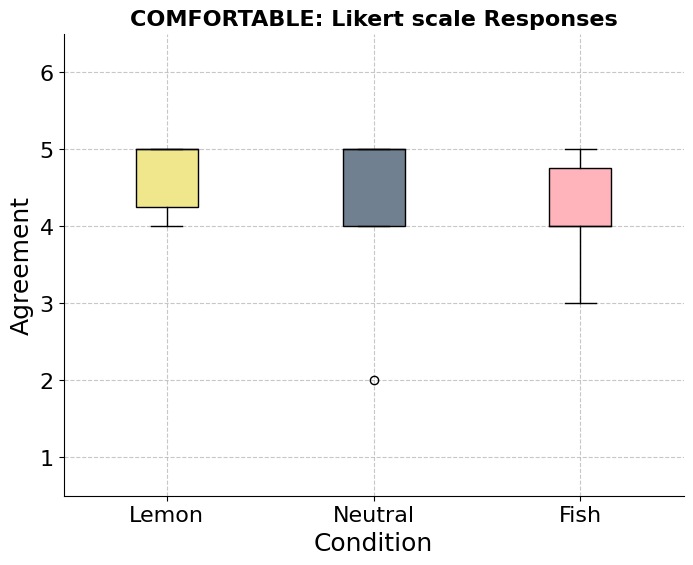

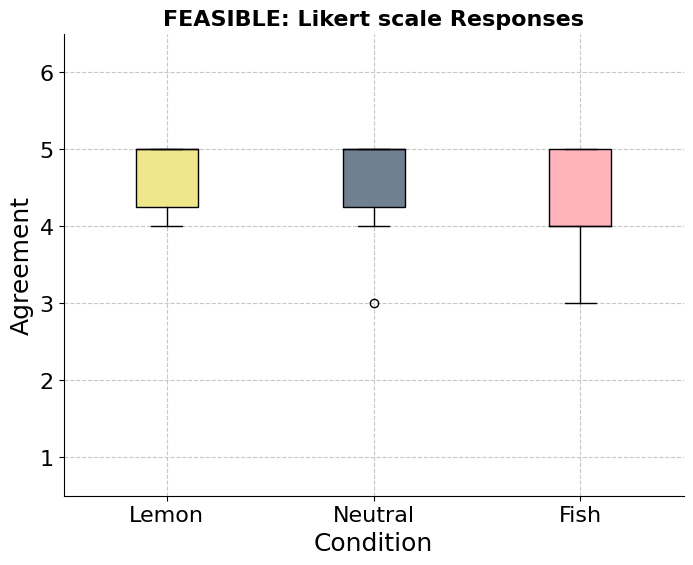

In [5]:
data_ability = {
    'fish' : [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [1, 2, 4, 4, 4, 5, 5, 5, 5, 5]
}

data_comfortable = {
    'fish': [3, 3, 4, 4, 4, 4, 4, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [2, 4, 4, 4, 5, 5, 5, 5, 5, 5]
}

data_feasible = {
    'fish': [3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [3, 4, 4, 5, 5, 5, 5, 5, 5, 5]
}

# Revised colors for the plot
colors = ['#F0E68C', '#708090', '#FFB3BA']  # Softer yellow for Lemon, Slate Gray for Neutral, and keeping the existing color for Fish

# Plotting function for each dataset
def plot_box_and_whisker(data, title):
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(
        [data['lemon'], data['neutral'], data['fish']], 
        labels=['Lemon', 'Neutral', 'Fish'], 
        patch_artist=True, 
        boxprops=dict(facecolor='lightgray', color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black')
    )

    # Set individual colors for the boxes
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Adding title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Condition", fontsize=18)
    plt.ylabel("Agreement", fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Calculate p-value for significance between Lemon and Fish (e.g., using a t-test)
    t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])
 
    ax = plt.gca()
    ax.set_ylim([0.5,6.5])

    # Remove top and right spines for a cleaner look
    sns.despine()
    # plt.savefig(f"figures/likert_{outfname}.png", dpi=150)

    # Show the plot
    plt.show()

# Plotting each category
plot_box_and_whisker(data_ability, "ABILITY: Likert scale Responses")
plot_box_and_whisker(data_comfortable, "COMFORTABLE: Likert scale Responses")
plot_box_and_whisker(data_feasible, "FEASIBLE: Likert scale Responses")

### PANAS

INIT_PANAS_POS

Neutral: [13.0, 14.0, 18.0, 22.0, 24.0, 24.0, 30.0, 31.0, 33.0, 38.0]
Lemon: [15.0, 23.0, 25.0, 28.0, 28.0, 28.0, 34.0, 36.0, 36.0, 39.0]
Fish: [16.0, 20.0, 27.0, 27.0, 27.0, 28.0, 29.0, 31.0, 32.0, 39.0]

Neutral, num elements: 10, mean: 24.7, std: 7.861933604400383, normal (above 0.05 is normal): 0.7884310483932495
Lemon, num elements: 10, mean: 29.2, std: 6.881860213634101, normal (above 0.05 is normal): 0.5943338871002197
fish, num elements: 10, mean: 27.6, std: 5.96992462263972, normal (above 0.05 is normal): 0.5334285497665405
ANOVA F: 0.9701678060907398, P VAL: 0.39184355962049

INIT_PANAS_NEG

Neutral: [10.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 19.0]
Lemon: [10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 16.0]
Fish: [10.0, 11.0, 11.0, 12.0, 12.0, 13.0, 15.0, 16.0, 17.0, 24.0]

Neutral, num elements: 10, mean: 12.7, std: 2.4103941586387903, normal (above 0.05 is normal): 0.012368007563054562
Lemon, num elements: 10, mean: 11.4, std: 1.743559577

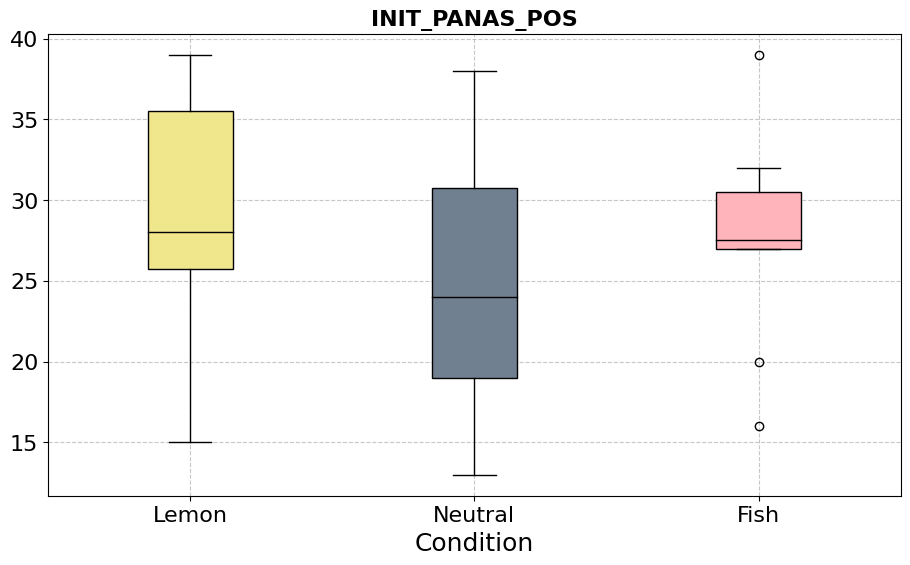

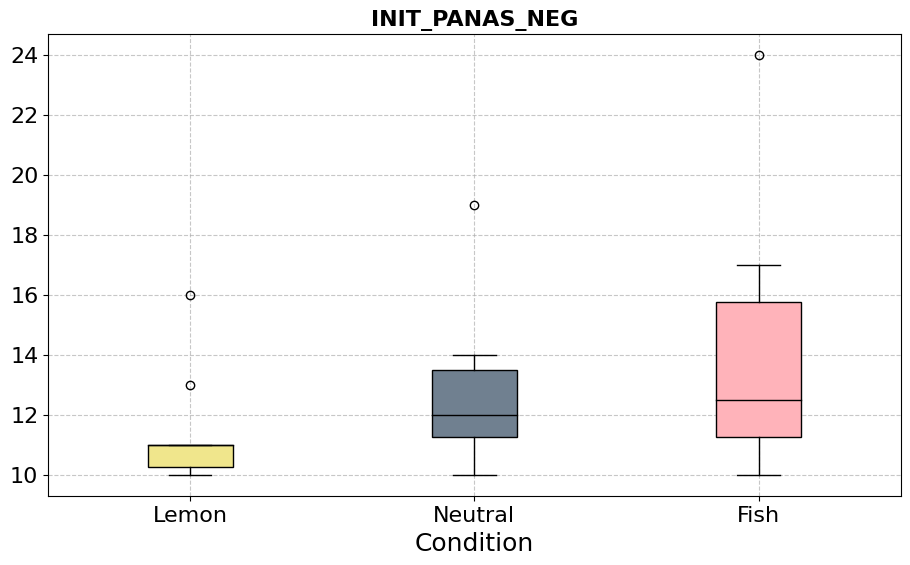

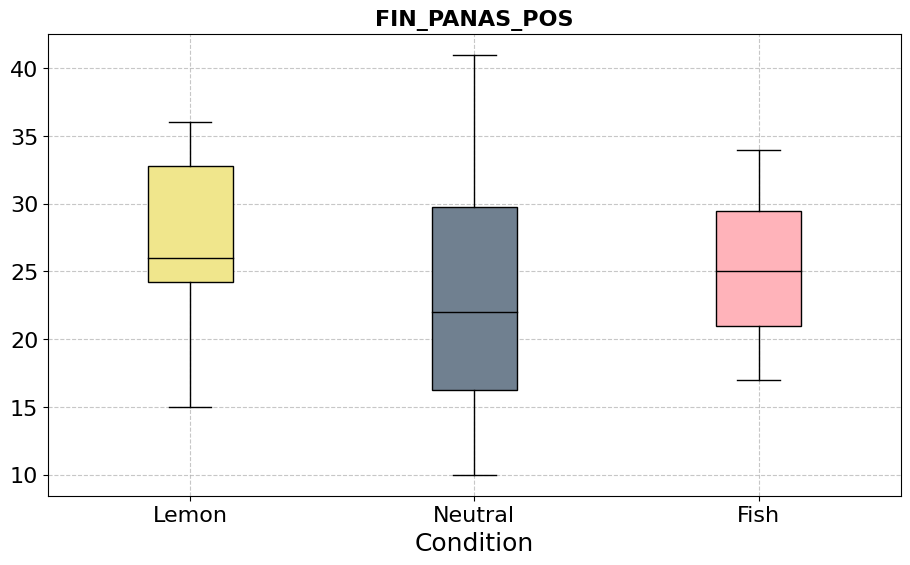

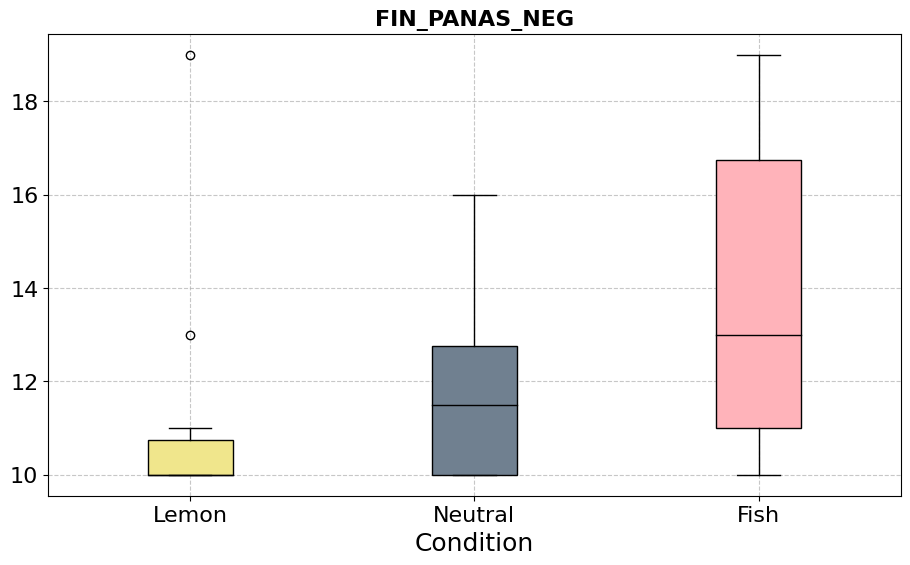

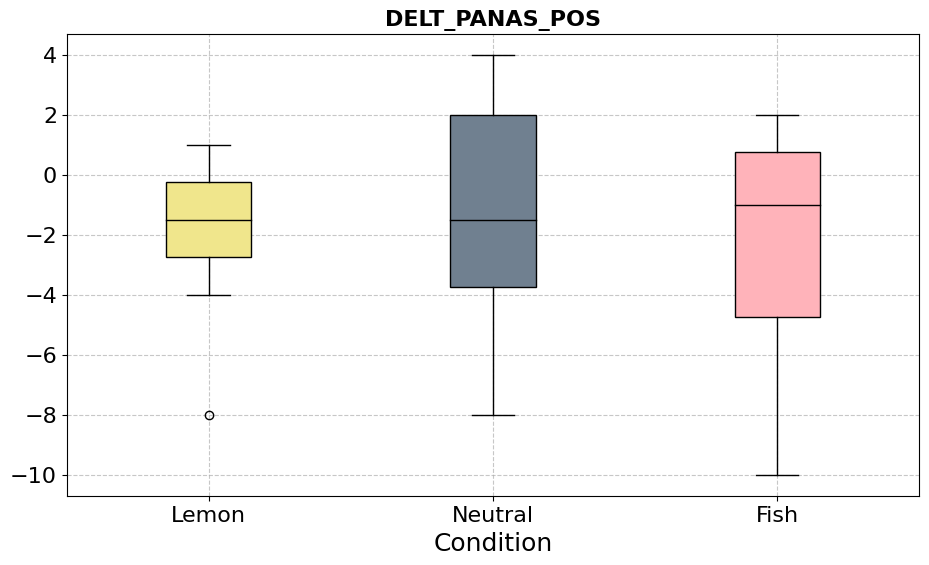

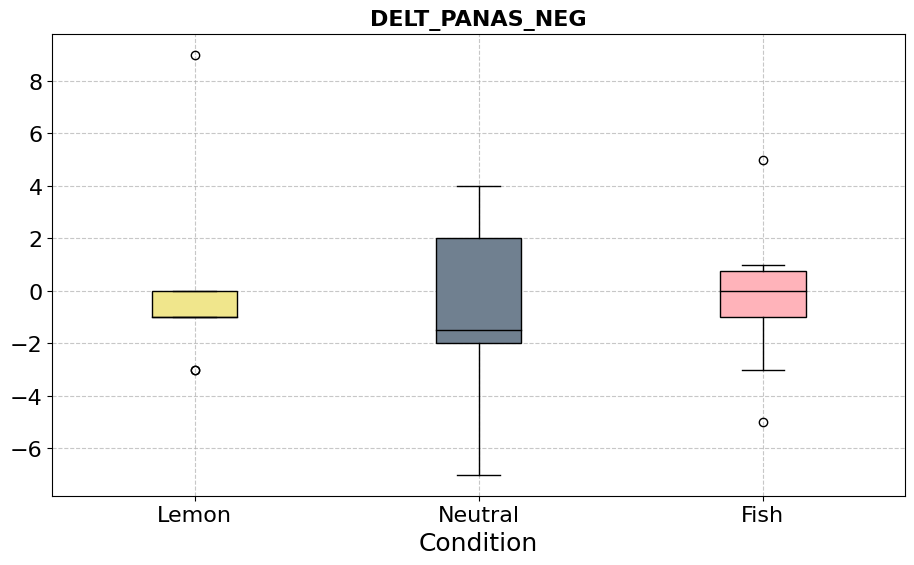

In [6]:
# Experimental data spreadsheet
# mood sheet
# paired t-tests?
# t - tests between 
relevant_columns = ['INIT_PANAS_POS', 'INIT_PANAS_NEG', 'FIN_PANAS_POS', 'FIN_PANAS_NEG', 'DELT_PANAS_POS', 'DELT_PANAS_NEG']
for col in relevant_columns:
    fish, lemon, neutral = make_three_group_lists(mood_data, col)
    three_lists_stats(fish, lemon, neutral, col)